**Steepest descent (Descenso por gradiente)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

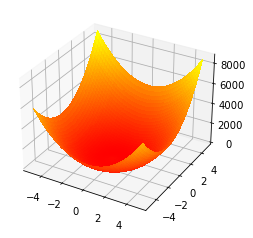

In [2]:
def f(X):
    x1 = X[0]
    x2 = X[1]
    k1 = 100    #N/m
    k2 = 90     #N/m
    Fx1,Fx2 = 20,40
    ans = k1*(np.sqrt(x1**2+(x2+1)**2)-1)**2 + k2*(np.sqrt(x1**2+(x2+1)**2)-1)**2 - (Fx1*x1+Fx2*x2)
    #print(type(ans))
    return ans


X1 = np.arange(-5, 5, 0.01)
X2 = np.arange(-5, 5, 0.01)

x1, x2 = np.meshgrid(X1, X2)

#f = x1**2 + x2**2 - 2*x1 #primera función
z = f([x1,x2]) #segunda función


#hacemos una nueva figura
fig = plt.figure()
#axis
ax = fig.add_subplot(projection = '3d')

surf = ax.plot_surface(x1, x2, z, cmap=cm.autumn, linewidth=0, antialiased = False)

plt.show()

In [3]:
#Definciones de Hessiana y gradiente
#gradient one variable 
def gradient(x,delta):
    grad=np.zeros(2)
    grad[0]=(f([x[0]+delta,x[1]])- f([x[0]-delta,x[1]]))/(2*delta)
    grad[1]=(f([x[0],x[1]+delta])- f([x[0],x[1]-delta]))/(2*delta)
    return grad

In [4]:
#Definir el método para recalcular alpha
def goldenSection(x, search):
    a = -5
    b = 5
    tau = 0.381967
    epsilon = 1e-5
    alpha1 = a*(1 - tau) + b*tau
    alpha2 = a*tau + b*(1 - tau)
    falpha1 = f(x + alpha1*search)
    falpha2 = f(x + alpha2*search)
    for _ in range(0, 1000):
        if falpha1 > falpha2:
            a = alpha1
            alpha1 = alpha2
            falpha1 = falpha2
            alpha2 = tau*a + (1 - tau)*b
            falpha2 = f(x + alpha2*search)
        else:
            b = alpha2
            alpha2  = alpha1
            falpha2 = falpha1
            alpha1  = tau*b + (1 - tau)*a
            falpha1 = f(x + alpha1*search)
        if abs(f(x + alpha1*search) - f(x + alpha2*search)) < epsilon:
            break
    return alpha1, falpha1



In [5]:
delta = 0.001
epsilon1 = 0.01
epsilon2 = 0.01
iteraciones = 1000
#alpha = 1.61803398875

X = np.zeros(2)
X[0]=2
X[1]=2
alpha,falpha = goldenSection(X,gradient(X,delta)) #TODO aplicar golden section para recalcular alpha
#alpha=0.0001

for i in range(iteraciones):
    X = X - alpha*gradient(X,delta)

print(X)
print(f(X))

[1.88632063e+13 2.12181939e+13]
1.5314613805913434e+29
